In [10]:
#!pip install osmnx>=0.13
#!pip install networkx
import networkx as nx
import folium
import numpy as np

In [11]:
import osmnx as ox
print(ox.__version__)
ox.config(log_file=True, log_console=True, use_cache=True)

2022-02-24 14:35:56.546 Configured OSMnx 1.1.2
2022-02-24 14:35:56.546 HTTP response caching is on


1.1.2
2022-02-24 14:35:56 Configured OSMnx 1.1.2
2022-02-24 14:35:56 HTTP response caching is on


In [12]:
# establecemos un conjunto de coordenadas arbitrarias
norte, sur, este, oeste = -34.506274, -34.533818, -58.566442, -58.589830

# instanciamos nuestro grafo con bounding box
G = ox.graph_from_bbox(norte, sur, este, oeste, network_type='drive_service')

2022-02-24 14:35:57.542 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-24 14:35:57.557 Projected GeoDataFrame to epsg:4326
2022-02-24 14:35:57.571 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-24 14:35:57.587 Projected GeoDataFrame to epsg:4326
2022-02-24 14:35:57.589 Requesting data within polygon from API in 1 request(s)
2022-02-24 14:35:57.594 Resolved overpass-api.de to 178.63.11.215


2022-02-24 14:35:57 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-24 14:35:57 Projected GeoDataFrame to epsg:4326
2022-02-24 14:35:57 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-24 14:35:57 Projected GeoDataFrame to epsg:4326
2022-02-24 14:35:57 Requesting data within polygon from API in 1 request(s)
2022-02-24 14:35:57 Resolved overpass-api.de to 178.63.11.215


2022-02-24 14:36:20.265 Pausing 0 seconds before making HTTP POST request
2022-02-24 14:36:20.267 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbridleway%7Cbus_guideway%7Cconstruction%7Ccorridor%7Ccycleway%7Celevator%7Cescalator%7Cfootway%7Cpath%7Cpedestrian%7Cplanned%7Cplatform%7Cproposed%7Craceway%7Csteps%7Ctrack%22%5D%5B%22motor_vehicle%22%21~%22no%22%5D%5B%22motorcar%22%21~%22no%22%5D%5B%22service%22%21~%22emergency_access%7Cparking%7Cparking_aisle%7Cprivate%22%5D%28poly%3A%27-34.533818+-58.595277+-34.506274+-58.595275+-34.505832+-58.595249+-34.505394+-58.595171+-34.504965+-58.595041+-34.504549+-58.594861+-34.504149+-58.594632+-34.503769+-58.594357+-34.503414+-58.594039+-34.503086+-58.593680+-34.502789+-58.593284+-34.502526+-58.592855+-34.502298+-58.592396+-34.502109+-58.591913+-34.501960+-58.591410+-34.501853+-58.5908

2022-02-24 14:36:20 Pausing 0 seconds before making HTTP POST request
2022-02-24 14:36:20 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbridleway%7Cbus_guideway%7Cconstruction%7Ccorridor%7Ccycleway%7Celevator%7Cescalator%7Cfootway%7Cpath%7Cpedestrian%7Cplanned%7Cplatform%7Cproposed%7Craceway%7Csteps%7Ctrack%22%5D%5B%22motor_vehicle%22%21~%22no%22%5D%5B%22motorcar%22%21~%22no%22%5D%5B%22service%22%21~%22emergency_access%7Cparking%7Cparking_aisle%7Cprivate%22%5D%28poly%3A%27-34.533818+-58.595277+-34.506274+-58.595275+-34.505832+-58.595249+-34.505394+-58.595171+-34.504965+-58.595041+-34.504549+-58.594861+-34.504149+-58.594632+-34.503769+-58.594357+-34.503414+-58.594039+-34.503086+-58.593680+-34.502789+-58.593284+-34.502526+-58.592855+-34.502298+-58.592396+-34.502109+-58.591913+-34.501960+-58.591410+-34.501853+-58.590892+-34.5

2022-02-24 14:36:28.264 Downloaded 456.6kB from overpass-api.de
2022-02-24 14:36:28.277 Saved response to cache file "cache/f6a6cb29a2cd7c598d481925162d735fba29d163.json"
2022-02-24 14:36:28.278 Got all network data within polygon from API in 1 request(s)
2022-02-24 14:36:28.279 Creating graph from downloaded OSM data...
2022-02-24 14:36:28.308 Created graph with 2619 nodes and 5473 edges
2022-02-24 14:36:28.330 Added length attributes to graph edges
2022-02-24 14:36:28.331 Identifying all nodes that lie outside the polygon...
2022-02-24 14:36:28.391 Created nodes GeoDataFrame from graph
2022-02-24 14:36:28.442 Created r-tree spatial index for 2619 geometries
2022-02-24 14:36:28.470 Identified 2070 geometries inside polygon
2022-02-24 14:36:28.492 Removed 549 nodes outside polygon


2022-02-24 14:36:28 Downloaded 456.6kB from overpass-api.de
2022-02-24 14:36:28 Saved response to cache file "cache/f6a6cb29a2cd7c598d481925162d735fba29d163.json"
2022-02-24 14:36:28 Got all network data within polygon from API in 1 request(s)
2022-02-24 14:36:28 Creating graph from downloaded OSM data...
2022-02-24 14:36:28 Created graph with 2619 nodes and 5473 edges
2022-02-24 14:36:28 Added length attributes to graph edges
2022-02-24 14:36:28 Identifying all nodes that lie outside the polygon...
2022-02-24 14:36:28 Created nodes GeoDataFrame from graph
2022-02-24 14:36:28 Created r-tree spatial index for 2619 geometries
2022-02-24 14:36:28 Identified 2070 geometries inside polygon


2022-02-24 14:36:28.492 Truncated graph by polygon
2022-02-24 14:36:28.501 Begin topologically simplifying the graph...
2022-02-24 14:36:28.533 Identified 1217 edge endpoints
2022-02-24 14:36:28.603 Simplified graph: 2070 to 1217 nodes, 4523 to 3157 edges
2022-02-24 14:36:28.605 Identifying all nodes that lie outside the polygon...


2022-02-24 14:36:28 Removed 549 nodes outside polygon
2022-02-24 14:36:28 Truncated graph by polygon
2022-02-24 14:36:28 Begin topologically simplifying the graph...
2022-02-24 14:36:28 Identified 1217 edge endpoints
2022-02-24 14:36:28 Simplified graph: 2070 to 1217 nodes, 4523 to 3157 edges
2022-02-24 14:36:28 Identifying all nodes that lie outside the polygon...


2022-02-24 14:36:28.700 Created nodes GeoDataFrame from graph
2022-02-24 14:36:28.727 Created r-tree spatial index for 1217 geometries
2022-02-24 14:36:28.740 Identified 698 geometries inside polygon
2022-02-24 14:36:28.755 Removed 519 nodes outside polygon
2022-02-24 14:36:28.763 Removed 1 isolated nodes
2022-02-24 14:36:28.783 Got largest weakly connected component (623 of 697 total nodes)
2022-02-24 14:36:28.784 Truncated graph by polygon
2022-02-24 14:36:28.799 Counted undirected street segments incident on each node
2022-02-24 14:36:28.800 graph_from_polygon returned graph with 623 nodes and 1672 edges
2022-02-24 14:36:28.808 graph_from_bbox returned graph with 623 nodes and 1672 edges


2022-02-24 14:36:28 Created nodes GeoDataFrame from graph
2022-02-24 14:36:28 Created r-tree spatial index for 1217 geometries
2022-02-24 14:36:28 Identified 698 geometries inside polygon
2022-02-24 14:36:28 Removed 519 nodes outside polygon
2022-02-24 14:36:28 Removed 1 isolated nodes
2022-02-24 14:36:28 Got largest weakly connected component (623 of 697 total nodes)
2022-02-24 14:36:28 Truncated graph by polygon
2022-02-24 14:36:28 Counted undirected street segments incident on each node
2022-02-24 14:36:28 graph_from_polygon returned graph with 623 nodes and 1672 edges
2022-02-24 14:36:28 graph_from_bbox returned graph with 623 nodes and 1672 edges


In [13]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

2022-02-24 14:36:42.483 Begin plotting the graph...
2022-02-24 14:36:42.594 Created edges GeoDataFrame from graph


2022-02-24 14:36:42 Begin plotting the graph...
2022-02-24 14:36:42 Created edges GeoDataFrame from graph


2022-02-24 14:36:42.740 Created nodes GeoDataFrame from graph


2022-02-24 14:36:42 Created nodes GeoDataFrame from graph


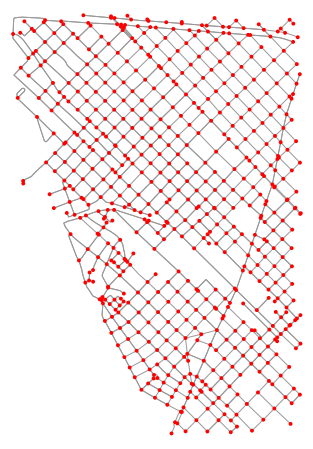

2022-02-24 14:36:42.835 Finished plotting the graph


2022-02-24 14:36:42 Finished plotting the graph


In [14]:
fig, ax = ox.plot_graph(G, bgcolor='w',node_color='r')

## Shortest path 

In [32]:
route = nx.shortest_path(G,247762121, 332574963)

In [33]:
route

[247762121,
 574398364,
 574398262,
 574398367,
 597220561,
 597220553,
 332574927,
 574398487,
 333743129,
 332575036,
 332574963]

In [34]:
G.nodes(data=True)

NodeDataView({247762121: {'y': -34.526206, 'x': -58.5726953, 'street_count': 3, 'ordinal_idx': 1}, 247762133: {'y': -34.5164613, 'x': -58.5684887, 'street_count': 4, 'ordinal_idx': 2}, 247762140: {'y': -34.5117612, 'x': -58.567185, 'highway': 'traffic_signals', 'street_count': 4, 'ordinal_idx': 3}, 332574902: {'y': -34.5336217, 'x': -58.5756365, 'street_count': 4, 'ordinal_idx': 4}, 332574907: {'y': -34.5291768, 'x': -58.5703949, 'street_count': 4, 'ordinal_idx': 5}, 332574909: {'y': -34.5328924, 'x': -58.5747734, 'street_count': 4, 'ordinal_idx': 6}, 332574910: {'y': -34.5321377, 'x': -58.5738748, 'street_count': 4, 'ordinal_idx': 7}, 332574911: {'y': -34.5314214, 'x': -58.5729941, 'street_count': 4, 'ordinal_idx': 8}, 332574912: {'y': -34.5313771, 'x': -58.5676672, 'street_count': 4, 'ordinal_idx': 9}, 332574927: {'y': -34.5306699, 'x': -58.5721272, 'street_count': 4, 'ordinal_idx': 10}, 332574928: {'y': -34.5299114, 'x': -58.5712675, 'street_count': 3, 'ordinal_idx': 11}, 332574963:

In [35]:
ox.folium.plot_route_folium(G,route, color='red')

2022-02-24 15:40:06.767 Created edges GeoDataFrame from graph


2022-02-24 15:40:06 Created edges GeoDataFrame from graph


## Node attributes 

In [12]:
# impute edge (driving) speeds and calculate edge traversal times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

2022-02-19 13:41:40 Created edges GeoDataFrame from graph
2022-02-19 13:41:40 Created edges GeoDataFrame from graph


In [13]:
# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.utils_graph.get_digraph(G, weight="travel_time")

2022-02-19 13:41:40 Converted MultiDiGraph to DiGraph


In [14]:
# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

In [15]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

2022-02-24 14:36:52.972 Created nodes GeoDataFrame from graph
2022-02-24 14:36:53.070 Created edges GeoDataFrame from graph


2022-02-24 14:36:52 Created nodes GeoDataFrame from graph
2022-02-24 14:36:53 Created edges GeoDataFrame from graph


In [24]:
ox.graph_to_gdfs(G)[0]

2022-02-19 14:28:29 Created nodes GeoDataFrame from graph
2022-02-19 14:28:29 Created edges GeoDataFrame from graph


,y,x,street_count,bc,highway,geometry
osmid,,,,,,
247762121,-34.526206,-58.572695,3,0.174006,NaN,POINT (-58.57270 -34.52621)
247762133,-34.516461,-58.568489,4,0.040876,NaN,POINT (-58.56849 -34.51646)
247762140,-34.511761,-58.567185,4,0.023709,traffic_signals,POINT (-58.56719 -34.51176)
332574902,-34.533622,-58.575637,4,0.000000,NaN,POINT (-58.57564 -34.53362)
332574907,-34.529177,-58.570395,4,0.039661,NaN,POINT (-58.57039 -34.52918)
...,...,...,...,...,...,...
6894322151,-34.510151,-58.566522,3,0.000000,NaN,POINT (-58.56652 -34.51015)
7064512813,-34.521276,-58.573771,1,0.000000,NaN,POINT (-58.57377 -34.52128)
7064512814,-34.524968,-58.582046,3,0.019834,NaN,POINT (-58.58205 -34.52497)


In [16]:
import branca

2022-02-19 13:42:31 Begin plotting the graph...
2022-02-19 13:42:31 Created edges GeoDataFrame from graph
2022-02-19 13:42:31 Created nodes GeoDataFrame from graph


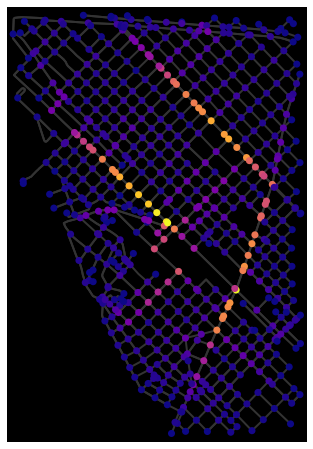

2022-02-19 13:42:31 Finished plotting the graph


In [17]:
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

In [18]:
gdf_nodes['nc'] = nc

In [19]:
zoom_value = 13

In [ ]:
min_color = gdf_nodes.loc[gdf_nodes['bc']==gdf_nodes['bc'].min()]['nc'].unique()
max_color = gdf_nodes.loc[gdf_nodes['bc']==gdf_nodes['bc'].max()]['nc'].unique()

In [20]:
min_value = gdf_nodes['bc'].min()
max_value = gdf_nodes['bc'].max()

In [21]:
add_legend=True

In [22]:
y = gdf_nodes['y'].mean()
x = gdf_nodes['x'].mean()

m = folium.Map(location=[y,x], zoom_start=zoom_value, tiles="cartodbpositron")
occurences = folium.map.FeatureGroup()
                                                
colormap = branca.colormap.LinearColormap(colors=list(gdf_nodes.sort_values(by='bc')['nc'].values), 
                                          index=list(gdf_nodes.sort_values(by='bc')['bc'].values),
                                          vmin=min_value,vmax=max_value)
     
if add_legend:
    colormap = colormap.to_step(index=np.linspace(min_value, max_value, num=10))
    colormap.caption = 'Betweenness centrality'
    colormap.add_to(m)


for y, x, bc in zip(gdf_nodes['y'], gdf_nodes['x'], gdf_nodes['bc'], ):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [y, x],
            radius= 5,
            color=None,
            fill=True,
            fill_color=colormap.rgba_hex_str(bc),
            fill_opacity=0.6,
            tooltip = round(bc,2)
            )
        )

m.add_child(occurences)

In [23]:
y = gdf_nodes['y'].mean()
x = gdf_nodes['x'].mean()

m1 = folium.Map(location=[y,x], zoom_start=zoom_value, tiles="cartodbpositron")
occurences = folium.map.FeatureGroup()

colormap = branca.colormap.LinearColormap(colors=['purple','yellow'],#[min_color[0],max_color[0]], 
                                          vmin=min_value,vmax=max_value)
colormap.caption = 'Betweenness centrality'
colormap.add_to(m1)

for y, x, bc in zip(gdf_nodes['y'], gdf_nodes['x'], gdf_nodes['bc'], ):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [y, x],
            radius= 5,
            color=None,
            fill=True,
            fill_color=colormap.rgba_hex_str(bc),
            fill_opacity=0.6,
            tooltip = round(bc,2)
            )
        )

m1.add_child(occurences)

In [35]:
import streamlit_folium as sf

In [39]:
print(sf.__version__)

AttributeError: module 'streamlit_folium' has no attribute '__version__'

In [1]:
!pip list

Package                       Version      Editable project location
----------------------------- ------------ ---------------------------------
altair                        4.1.0
argon2-cffi                   21.1.0
astor                         0.8.1
attrs                         21.2.0
backcall                      0.2.0
backports.zoneinfo            0.2.1
base58                        2.1.0
bleach                        4.1.0
blinker                       1.4
branca                        0.4.2
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.7
click                         7.1.2
click-plugins                 1.1.1
cligj                         0.7.2
cycler                        0.10.0
debugpy                       1.5.1
decorator                     5.1.0
defusedxml                    0.7.1
entrypoints                   0.3
Fiona                         1.8.20
folium               

In [45]:
!pip install -U streamlit-folium

  Using cached streamlit_folium-0.6.2-py3-none-any.whl (418 kB)
     |████████████████████████████████| 9.7 MB 206 kB/s            
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)


  Attempting uninstall: streamlit
    Found existing installation: streamlit 1.1.0
    Uninstalling streamlit-1.1.0:
      Successfully uninstalled streamlit-1.1.0
  Attempting uninstall: streamlit-folium
    Found existing installation: streamlit-folium 0.4.0
    Uninstalling streamlit-folium-0.4.0:
      Successfully uninstalled streamlit-folium-0.4.0
You should consider upgrading via the '/home/federico/federico/SSYT/venv/bin/python -m pip install --upgrade pip' command.


In [8]:
mapdata={}
bool(mapdata)

False

In [9]:
gdf_nodes

NameError: name 'gdf_nodes' is not defined

In [18]:
gdf_nodes['idx'] = range(0, len(gdf_nodes))

In [19]:
gdf_nodes['idx']

osmid
247762121       0
247762133       1
247762140       2
332574902       3
332574907       4
             ... 
6894322151    618
7064512813    619
7064512814    620
8075777043    621
8075777047    622
Name: idx, Length: 623, dtype: int64

In [20]:
range(1, len(gdf_nodes))

range(1, 623)

In [21]:
G

In [26]:
counter = 1
for n in G.nodes(data=True):
    n[1]['ordinal_idx'] = counter
    counter += 1

In [29]:
ordinal_idx_to_osmnidx = {}
for n in G.nodes(data=True):
    ordinal_idx_to_osmnidx[n[1]['ordinal_idx']] = n[0]

In [30]:
ordinal_idx_to_osmnidx

{1: 247762121,
 2: 247762133,
 3: 247762140,
 4: 332574902,
 5: 332574907,
 6: 332574909,
 7: 332574910,
 8: 332574911,
 9: 332574912,
 10: 332574927,
 11: 332574928,
 12: 332574963,
 13: 332575036,
 14: 332575068,
 15: 332575072,
 16: 332575107,
 17: 332575111,
 18: 332575145,
 19: 332575153,
 20: 332575177,
 21: 332575184,
 22: 332575201,
 23: 332575298,
 24: 332575303,
 25: 332575307,
 26: 333031582,
 27: 333031605,
 28: 333031614,
 29: 333031719,
 30: 333031729,
 31: 333031737,
 32: 333031883,
 33: 333728217,
 34: 333730572,
 35: 333730575,
 36: 333730578,
 37: 333730581,
 38: 333730584,
 39: 333730587,
 40: 333730591,
 41: 333730594,
 42: 333730597,
 43: 333730600,
 44: 333730603,
 45: 333730606,
 46: 333730610,
 47: 333730613,
 48: 333730616,
 49: 333730620,
 50: 333730623,
 51: 333730627,
 52: 333730630,
 53: 333730634,
 54: 333730637,
 55: 333730640,
 56: 333730643,
 57: 333730646,
 58: 333730650,
 59: 333730653,
 60: 333730656,
 61: 333730659,
 62: 333730663,
 63: 333730666,
 

In [36]:
G

In [67]:
kwargs = {'weight' : '0.75', 'color': 'lightblue'}
print(type(ox.plot_graph_folium(G, **kwargs)))

2022-02-25 15:27:12.933 Created edges GeoDataFrame from graph


2022-02-25 15:27:12 Created edges GeoDataFrame from graph
<class 'folium.folium.Map'>


In [65]:
G = ox.graph_from_address('Villa Hidalgo, José León Suárez, Partido de General San Martín, Buenos Aires',
                          network_type='walk')

2022-02-25 15:15:35.997 Retrieved response from cache file "cache/84e840ef369d9784b2532eb7b60278e793616fd6.json"
2022-02-25 15:15:35.997 Geocoded "Villa Hidalgo, José León Suárez, Partido de General San Martín, Buenos Aires" to (-34.5136179, -58.5805519)
2022-02-25 15:15:35.998 Created bbox 1000 m from (-34.5136179, -58.5805519): -34.504624696645074,-34.522611103354926,-58.56963770624905,-58.59146609375096
2022-02-25 15:15:36.016 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-25 15:15:36.032 Projected GeoDataFrame to epsg:4326
2022-02-25 15:15:36.047 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-25 15:15:36.061 Projected GeoDataFrame to epsg:4326
2022-02-25 15:15:36.062 Requesting data within polygon from API in 1 request(s)
2022-02-25 15:15:36.106 Resolved overpass-api.de to 178.63.48.217


2022-02-25 15:15:35 Retrieved response from cache file "cache/84e840ef369d9784b2532eb7b60278e793616fd6.json"
2022-02-25 15:15:35 Geocoded "Villa Hidalgo, Jose? Leo?n Sua?rez, Partido de General San Marti?n, Buenos Aires" to (-34.5136179, -58.5805519)
2022-02-25 15:15:35 Created bbox 1000 m from (-34.5136179, -58.5805519): -34.504624696645074,-34.522611103354926,-58.56963770624905,-58.59146609375096
2022-02-25 15:15:36 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-25 15:15:36 Projected GeoDataFrame to epsg:4326
2022-02-25 15:15:36 Projected GeoDataFrame to +proj=utm +zone=21 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-02-25 15:15:36 Projected GeoDataFrame to epsg:4326
2022-02-25 15:15:36 Requesting data within polygon from API in 1 request(s)
2022-02-25 15:15:36 Resolved overpass-api.de to 178.63.48.217


2022-02-25 15:15:37.935 Pausing 0 seconds before making HTTP POST request
2022-02-25 15:15:37.938 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbus_guideway%7Cconstruction%7Ccycleway%7Cmotor%7Cplanned%7Cplatform%7Cproposed%7Craceway%22%5D%5B%22foot%22%21~%22no%22%5D%5B%22service%22%21~%22private%22%5D%28poly%3A%27-34.522611+-58.596913+-34.504625+-58.596911+-34.504183+-58.596885+-34.503745+-58.596807+-34.503316+-58.596677+-34.502899+-58.596497+-34.502499+-58.596268+-34.502120+-58.595993+-34.501765+-58.595675+-34.501437+-58.595316+-34.501140+-58.594920+-34.500876+-58.594491+-34.500649+-58.594033+-34.500460+-58.593549+-34.500311+-58.593046+-34.500203+-58.592528+-34.500138+-58.591999+-34.500117+-58.591466+-34.500117+-58.569638+-34.500138+-58.569105+-34.500203+-58.568576+-34.500311+-58.568058+-34.500460+-58.567554+-34.500649+-5

2022-02-25 15:15:37 Pausing 0 seconds before making HTTP POST request
2022-02-25 15:15:37 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbus_guideway%7Cconstruction%7Ccycleway%7Cmotor%7Cplanned%7Cplatform%7Cproposed%7Craceway%22%5D%5B%22foot%22%21~%22no%22%5D%5B%22service%22%21~%22private%22%5D%28poly%3A%27-34.522611+-58.596913+-34.504625+-58.596911+-34.504183+-58.596885+-34.503745+-58.596807+-34.503316+-58.596677+-34.502899+-58.596497+-34.502499+-58.596268+-34.502120+-58.595993+-34.501765+-58.595675+-34.501437+-58.595316+-34.501140+-58.594920+-34.500876+-58.594491+-34.500649+-58.594033+-34.500460+-58.593549+-34.500311+-58.593046+-34.500203+-58.592528+-34.500138+-58.591999+-34.500117+-58.591466+-34.500117+-58.569638+-34.500138+-58.569105+-34.500203+-58.568576+-34.500311+-58.568058+-34.500460+-58.567554+-34.500649+-58.567071

2022-02-25 15:15:46.973 Downloaded 292.8kB from overpass-api.de
2022-02-25 15:15:46.982 Saved response to cache file "cache/359f38349e4ba15d93aea38b5b470f69ac2bfce4.json"
2022-02-25 15:15:46.983 Got all network data within polygon from API in 1 request(s)
2022-02-25 15:15:46.983 Creating graph from downloaded OSM data...
2022-02-25 15:15:47.003 Created graph with 1653 nodes and 4430 edges
2022-02-25 15:15:47.021 Added length attributes to graph edges
2022-02-25 15:15:47.022 Identifying all nodes that lie outside the polygon...
2022-02-25 15:15:47.063 Created nodes GeoDataFrame from graph
2022-02-25 15:15:47.097 Created r-tree spatial index for 1653 geometries
2022-02-25 15:15:47.121 Identified 1317 geometries inside polygon
2022-02-25 15:15:47.139 Removed 336 nodes outside polygon
2022-02-25 15:15:47.139 Truncated graph by polygon
2022-02-25 15:15:47.145 Begin topologically simplifying the graph...
2022-02-25 15:15:47.166 Identified 790 edge endpoints


2022-02-25 15:15:46 Downloaded 292.8kB from overpass-api.de
2022-02-25 15:15:46 Saved response to cache file "cache/359f38349e4ba15d93aea38b5b470f69ac2bfce4.json"
2022-02-25 15:15:46 Got all network data within polygon from API in 1 request(s)
2022-02-25 15:15:46 Creating graph from downloaded OSM data...
2022-02-25 15:15:47 Created graph with 1653 nodes and 4430 edges
2022-02-25 15:15:47 Added length attributes to graph edges
2022-02-25 15:15:47 Identifying all nodes that lie outside the polygon...
2022-02-25 15:15:47 Created nodes GeoDataFrame from graph
2022-02-25 15:15:47 Created r-tree spatial index for 1653 geometries
2022-02-25 15:15:47 Identified 1317 geometries inside polygon
2022-02-25 15:15:47 Removed 336 nodes outside polygon
2022-02-25 15:15:47 Truncated graph by polygon
2022-02-25 15:15:47 Begin topologically simplifying the graph...
2022-02-25 15:15:47 Identified 790 edge endpoints


2022-02-25 15:15:47.225 Simplified graph: 1317 to 790 nodes, 3622 to 2568 edges
2022-02-25 15:15:47.226 Identifying all nodes that lie outside the polygon...
2022-02-25 15:15:47.252 Created nodes GeoDataFrame from graph
2022-02-25 15:15:47.271 Created r-tree spatial index for 790 geometries
2022-02-25 15:15:47.282 Identified 436 geometries inside polygon
2022-02-25 15:15:47.294 Removed 354 nodes outside polygon
2022-02-25 15:15:47.301 Removed 2 isolated nodes
2022-02-25 15:15:47.318 Got largest weakly connected component (424 of 434 total nodes)
2022-02-25 15:15:47.320 Truncated graph by polygon
2022-02-25 15:15:47.331 Counted undirected street segments incident on each node
2022-02-25 15:15:47.332 graph_from_polygon returned graph with 424 nodes and 1352 edges
2022-02-25 15:15:47.337 graph_from_bbox returned graph with 424 nodes and 1352 edges
2022-02-25 15:15:47.338 graph_from_point returned graph with 424 nodes and 1352 edges
2022-02-25 15:15:47.339 graph_from_address returned graph

2022-02-25 15:15:47 Simplified graph: 1317 to 790 nodes, 3622 to 2568 edges
2022-02-25 15:15:47 Identifying all nodes that lie outside the polygon...
2022-02-25 15:15:47 Created nodes GeoDataFrame from graph
2022-02-25 15:15:47 Created r-tree spatial index for 790 geometries
2022-02-25 15:15:47 Identified 436 geometries inside polygon
2022-02-25 15:15:47 Removed 354 nodes outside polygon
2022-02-25 15:15:47 Removed 2 isolated nodes
2022-02-25 15:15:47 Got largest weakly connected component (424 of 434 total nodes)
2022-02-25 15:15:47 Truncated graph by polygon
2022-02-25 15:15:47 Counted undirected street segments incident on each node
2022-02-25 15:15:47 graph_from_polygon returned graph with 424 nodes and 1352 edges
2022-02-25 15:15:47 graph_from_bbox returned graph with 424 nodes and 1352 edges
2022-02-25 15:15:47 graph_from_point returned graph with 424 nodes and 1352 edges
2022-02-25 15:15:47 graph_from_address returned graph with 424 nodes and 1352 edges


2022-02-25 15:16:15.141 Begin plotting the graph...
2022-02-25 15:16:15.259 Created edges GeoDataFrame from graph
2022-02-25 15:16:15.369 Created nodes GeoDataFrame from graph


2022-02-25 15:16:15 Begin plotting the graph...
2022-02-25 15:16:15 Created edges GeoDataFrame from graph
2022-02-25 15:16:15 Created nodes GeoDataFrame from graph


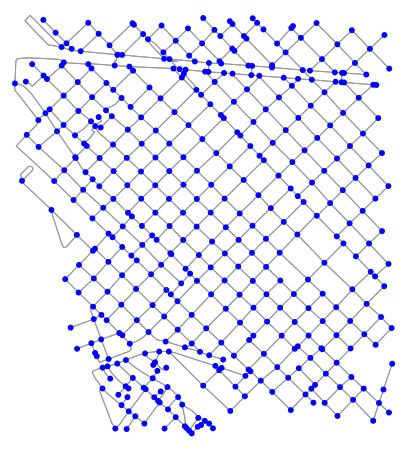

2022-02-25 15:16:15.456 Finished plotting the graph


2022-02-25 15:16:15 Finished plotting the graph


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [66]:
ox.plot_graph(G, bgcolor='white', node_color='blue', node_size=35)

In [68]:
gdf_nodes.total_bounds

array([-58.5893961, -34.5337611, -58.5664459, -34.5062782])